In [1]:
import numpy as np
import matplotlib.pyplot as plt
import timeit

import moduli_miguel as mm
from utils import get_dati_tommaso, split_train_test
import estimators
from scipy.stats import sem

#fa comparire i grafici direttamente sul notebook
%matplotlib inline 
plt.rcParams['image.cmap'] = 'viridis'
plt.rcParams['figure.figsize'] = (12,8)

%load_ext autoreload
%autoreload 2

In [2]:
import analyse_results_utils 
from analyse_results_utils import *

# analysis of synthetic (Dirichlet) data 

In [3]:
import pickle
import pandas as pd
import numpy as np
from numpy.linalg import inv
import utils

#resfile = 'all_results_dirichelet_final.pickle'
resfile1 = 'all_results_dirichelet_finalv2_smallTtest.pickle'
resfile2 = 'all_results_dirichelet_final_smallTtest.pickle'
#resfile = 'all_results_dirichelet_20210910_partial.pickle'
#resfile = 'all_results_dirichelet_final_ConservativePCA.pickle'

with open(resfile1, 'rb') as f:
    all_results1 = pickle.load(f)

with open(resfile2, 'rb') as f:
    all_results2 = pickle.load(f)


In [4]:
def compute_diffJtrue(all_results):
    for key, res in all_results.items():
#        Ctrue = res["Ctrue"]
        for method, resmethod in res.items():
            if method == "Ctrue":
                continue
            Ctrue = res["Ctrue"]
            Cclean = resmethod["Cclean"]
            Jclean=inv(Cclean)
            Jtrue=inv(Ctrue)
            resmethod["diffJtrue"] = np.mean(np.abs((Jtrue - Jclean)))/np.mean(np.abs(Jtrue)) 
            resmethod["diffCtrue"] = np.mean(np.abs((Ctrue - Cclean)))/np.mean(np.abs(Ctrue)) 
            resmethod["rel_diffCtrue"] = np.mean(np.abs((Ctrue - Cclean)/Ctrue)) #element-wise
            resmethod["rel_diffJtrue"] = np.mean(np.abs((Jtrue - Jclean)/Jtrue)) #element-wise
            resmethod["diffCtrue_HS"] = np.mean((Ctrue - Cclean)**2)
            resmethod["diffJtrue_HS"] = np.mean((Jtrue - Jclean)**2)

In [5]:
compute_diffJtrue(all_results1)
compute_diffJtrue(all_results2)
#aru.compute_diffJtrue(all_results)

In [6]:
df1 = pd.DataFrame(list(utils.splat_dict(all_results1)), columns=["subject", "method", "criterium", "value"])
df1 = df1[(df1.criterium != "history") & (df1.criterium != "Cclean") & (df1.method != "Ctrue")]
df1 = df1[(df1.method != "true_params")]
df1["value"] = df1["value"].astype(float)
df1["N"] = list(map(lambda x : x[3], df1.subject))
df1["Ttrain"] = list(map(lambda x : x[2], df1.subject))
df1["alpha"] = list(map(lambda x : x[1], df1.subject))
df1["subject"] = list(map(lambda x : x[0], df1.subject))

#df

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:55: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = libops.scalar_compare(x.ravel(), y, op)


In [7]:
df2 = pd.DataFrame(list(utils.splat_dict(all_results2)), columns=["subject", "method", "criterium", "value","other"])
df2 = df2[(df2.criterium != "history") & (df2.criterium != "Cclean") & (df2.method != "Ctrue")]
df2 = df2[(df2.method != "true_params")]
df2["value"] = df2["value"].astype(float)
df2["N"] = list(map(lambda x : x[3], df2.subject))
df2["Ttrain"] = list(map(lambda x : x[2], df2.subject))
df2["alpha"] = list(map(lambda x : x[1], df2.subject))
df2["subject"] = list(map(lambda x : x[0], df2.subject))


#df

In [8]:
df=pd.concat([df1,df2])

# I now visualise the results for the indicators corresponding to the regularised and to the non-regularised data

In [12]:
df[(df.alpha==1.0) & (df.Ttrain==144)].groupby(["method", "criterium"])["value"].mean().unstack()

criterium,cross_val_likelihood,diffCtrue,diffCtrue_HS,diffJtrue,diffJtrue_HS,rel_diffCtrue,rel_diffJtrue,test_completion_error,test_likelihood,test_pseudolikelihood,time,train_completion_error,train_likelihood,train_pseudolikelihood
method,,,,,,,,,,,,,,
ConservativePCA_CV,NaN,0.279112,0.005559,0.859520,4.429751,2.482182,2.945135,0.492273,-113.471703,NaN,5.013834,0.358911,-92.565975,NaN
ConservativePCA_CV_completion_error,NaN,0.299921,0.005627,0.811400,239.045418,2.584101,3.029589,0.470606,-116.263665,-0.880085,2.331404,0.311224,-89.271874,-0.524695
ConservativePCA_CV_likelihood,NaN,0.299994,0.005632,0.853555,227.381406,2.461213,2.442932,0.474251,-115.610305,-0.873814,3.882045,0.337401,-94.824782,-0.611271
ConservativePCA_CV_pseudolikelihood,NaN,0.300463,0.005663,0.852132,237.569865,2.473700,2.434362,0.473879,-115.695753,-0.873519,2.592066,0.336249,-94.884240,-0.611452
GA_bootstrapping=False_stop=completion,NaN,0.325116,0.008044,0.882749,5.531965,2.665968,2.574236,0.469398,-120.797837,NaN,16.157144,0.319467,-106.160020,NaN
GA_bootstrapping=False_stop=likelihood,NaN,0.321779,0.007773,0.906083,5.310694,2.666438,7.039808,0.495247,-128.544611,NaN,49.545993,0.269686,-87.903782,NaN
GA_bootstrapping=True_stop=completion,NaN,0.320803,0.007347,0.885629,5.569424,3.100563,2.438195,0.470878,-121.432852,NaN,24.243099,0.327696,-106.713378,NaN
GA_bootstrapping=True_stop=likelihood,NaN,0.318823,0.007169,0.828140,5.298112,3.159572,5.221769,0.488116,-123.843280,NaN,79.344155,0.301619,-88.997867,NaN
Lasso_CV,-137.186488,0.581028,0.049960,0.953265,5.732309,1.724947,1.196553,NaN,-136.401912,NaN,NaN,NaN,-130.495202,NaN


In [13]:
df[(df.alpha==1.) & (df.Ttrain==300)].groupby(["method", "criterium"])["value"].std().unstack() #/ np.sqrt(40)

criterium,cross_val_likelihood,diffCtrue,diffCtrue_HS,diffJtrue,diffJtrue_HS,rel_diffCtrue,rel_diffJtrue,test_completion_error,test_likelihood,test_pseudolikelihood,time,train_completion_error,train_likelihood,train_pseudolikelihood
method,,,,,,,,,,,,,,
ConservativePCA_CV,NaN,0.077945,0.000619,0.029130,30.615891,22.376526,1.074403,0.062896,25.499255,NaN,0.191904,0.068019,26.159273,NaN
ConservativePCA_CV_completion_error,NaN,0.083195,0.000614,0.053691,5705.919542,10.264440,2.626578,0.091628,37.147933,0.326711,0.113770,0.071673,37.503498,0.347033
ConservativePCA_CV_likelihood,NaN,0.080969,0.000632,0.031230,7409.187169,10.049664,1.557830,0.094163,36.836693,0.326663,0.124306,0.079109,37.857748,0.353363
ConservativePCA_CV_pseudolikelihood,NaN,0.080919,0.000624,0.039003,8166.333108,10.054560,1.572097,0.093186,36.680052,0.325161,0.129618,0.076270,37.053446,0.340293
GA_bootstrapping=False_stop=completion,NaN,0.060085,0.002996,0.076786,43.931102,16.312747,1.327431,0.072615,16.942584,NaN,9.590932,0.050923,14.567373,NaN
GA_bootstrapping=False_stop=likelihood,NaN,0.061192,0.003037,0.134408,43.682844,16.249853,2.204182,0.081227,22.315962,NaN,1.632373,0.043500,14.895665,NaN
GA_bootstrapping=True_stop=completion,NaN,0.089408,0.000762,0.069273,44.084362,21.327906,1.657002,0.072326,15.496273,NaN,12.383309,0.049557,12.834737,NaN
GA_bootstrapping=True_stop=likelihood,NaN,0.088343,0.000695,0.085652,43.686484,24.452618,2.001150,0.076654,20.315844,NaN,2.689941,0.046378,14.794059,NaN
Lasso_CV,9.01337,0.144598,0.063055,0.032919,44.377699,49.709573,0.250628,NaN,9.148031,NaN,NaN,NaN,8.384152,NaN


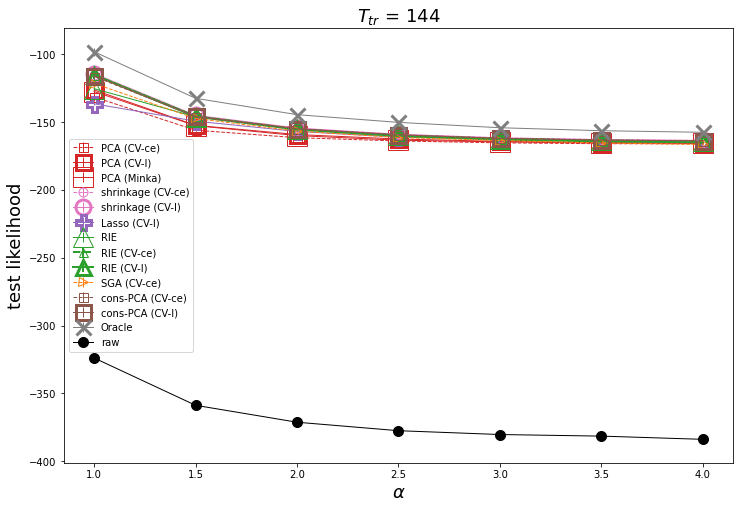

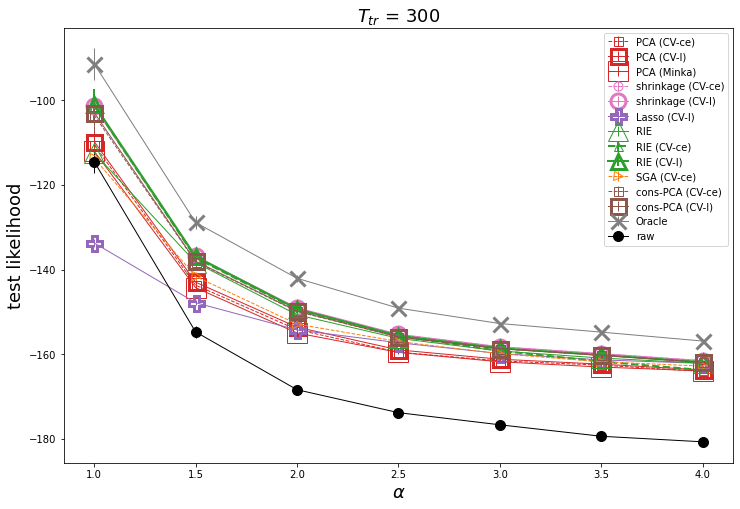

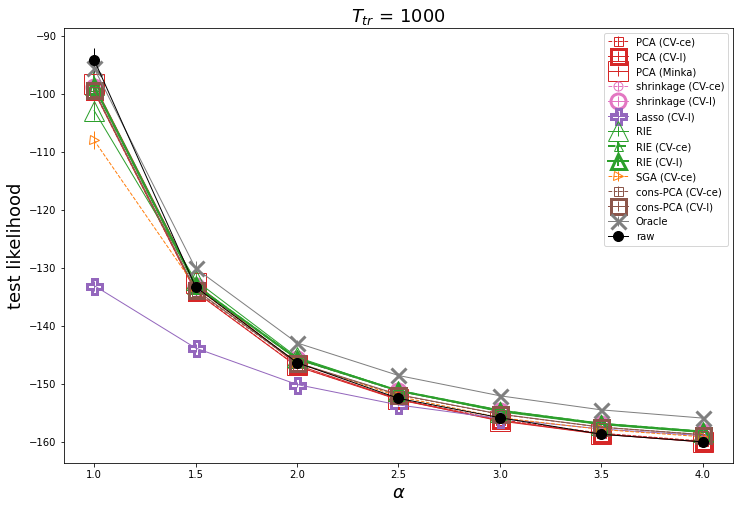

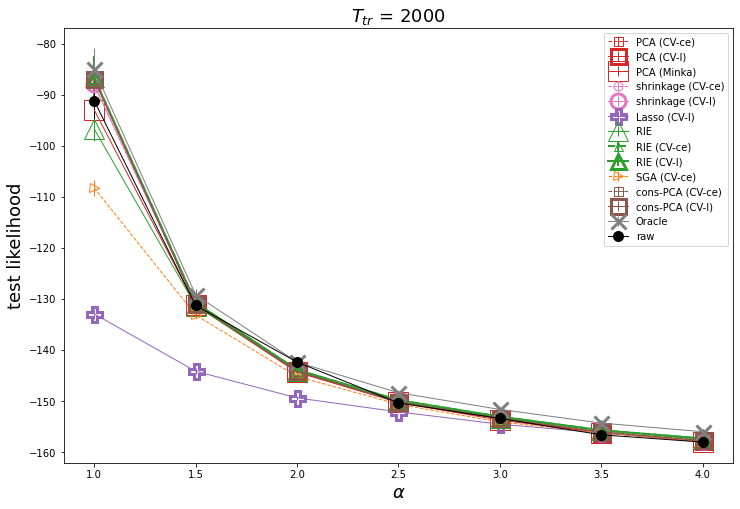

In [16]:
################################################
#criterio='diffCtrue'
criterio='test_likelihood'
#criterio='test_completion_error'
#criterio='diffJtrue'
#criterio="rel_diffCtrue"
#criterio="rel_diffJtrue"
#criterio="diffCtrue_HS"
#criterio="diffJtrue_HS"

add_rawdata = True
onefigureforeachT=True
################################################


from matplotlib.lines import Line2D




lista_alphas=np.sort(list(set(df.alpha)))

lista_Ts=np.sort(list(set(df.Ttrain)))

provisional_list=list(set(df.method))

if 'PCA_CV_pseudolikelihood' in provisional_list:
        provisional_list.remove('PCA_CV_pseudolikelihood')
if 'Shrink_CV_pseudolikelihood' in provisional_list:
        provisional_list.remove('Shrink_CV_pseudolikelihood')
if 'ConservativePCA_CV_pseudolikelihood' in provisional_list:
        provisional_list.remove('ConservativePCA_CV_pseudolikelihood')
if 'RIE_CV_pseudolikelihood' in provisional_list:
        provisional_list.remove('RIE_CV_pseudolikelihood')
if 'GA_bootstrapping=False_stop=completion' in provisional_list:
        provisional_list.remove('GA_bootstrapping=False_stop=completion')


if criterio != 'test_completion_error':
    if 'GA_bootstrapping=True_stop=likelihood' in provisional_list:
        provisional_list.remove('GA_bootstrapping=True_stop=likelihood')
    if 'GA_bootstrapping=False_stop=likelihood' in provisional_list:
        provisional_list.remove('GA_bootstrapping=False_stop=likelihood')

if criterio == 'test_completion_error': 
    if 'Lasso_CV' in provisional_list:
        provisional_list.remove('Lasso_CV')

if criterio == 'diffCtrue':
    if 'Oracle' in provisional_list:
        provisional_list.remove('Oracle')
    provisional_list=np.array(provisional_list)
    
lista_metodi=reorder_list_methods(provisional_list)

nTs=len(lista_Ts)
nalphas=len(lista_alphas)


if not onefigureforeachT:
    fig, axs = plt.subplots(4, 1, figsize=(15,40))
    axes = axs.flat
else:
    axes=len(lista_Ts)*[None]

for ax,myTtrain in zip( axes ,lista_Ts ):

    if onefigureforeachT:
        fig, ax = plt.subplots(1, 1) 

    for metodo in  lista_metodi :

        avs=np.zeros(nalphas)
        stds=np.zeros(nalphas)

        for j,myalpha in enumerate(lista_alphas):

            avs[j] = np.mean( df[(df.alpha==myalpha) & (df.Ttrain==myTtrain) & (df.method==metodo) & \
                   (df.criterium==criterio)]["value"] )
        
            if criterio=='test_completion_error': avs[j]=np.abs(avs[j])
        
            stds[j] = sem( df[(df.alpha==myalpha) & (df.Ttrain==myTtrain) & (df.method==metodo) & \
                   (df.criterium==criterio)]["value"] )

        
        pippo=line2Dprops_methods(metodo)


        ax.set_ylabel(legend_criteria(criterio),size=myaxessize)
        ax.set_xlabel('$\\alpha$',size=myaxessize)

        
        ax.set_title('$T_{tr}$ = '+str(myTtrain),size=myaxessize)
        
        ax.errorbar(lista_alphas[:],avs[:],\
                     yerr=stds[:],fmt='s-',\
                 label=legend_methods(metodo),\
                     marker=pippo['marker'],mfc = 'None',ms=pippo['ms'],\
                    ls=pippo['ls'],lw=pippo['lw'],mew=pippo['mew'],color='C'+str(pippo['colorindex']))

      
    ##############################
    # adding the raw (empirical data) estimators
    if add_rawdata and criterio != 'test_completion_error':
        av_raw_results = np.array([ np.average(raw_observables_noregularisation\
                                               (Ns=100,alpha=alpha,Ttrain=myTtrain,N=116, criterion=criterio) )\
                                   for alpha in lista_alphas ])
        std_raw_results = np.array([ sem(raw_observables_noregularisation\
                                         (Ns=100,alpha=alpha,Ttrain=myTtrain,N=116, criterion=criterio) )\
                                    for alpha in lista_alphas ])
        ax.errorbar(lista_alphas[:],av_raw_results[:],\
                         yerr=std_raw_results[:],fmt='o-',\
                     label='raw',\
                         ms=10.,\
                        ls='-',lw=1.,mew=1.,color='black')
    ##############################       
    ax.legend() 
    if onefigureforeachT:
        plt.savefig(criterio+"_vs_alpha_Ttrain"+str(myTtrain)+"rawdata"+str(add_rawdata)+".pdf")

        
#plt.ylim((-170,-150))
#plt.savefig(criterio+"_vs_alpha"+"_rawdata"+str(add_rawdata)+".pdf")
plt.show()


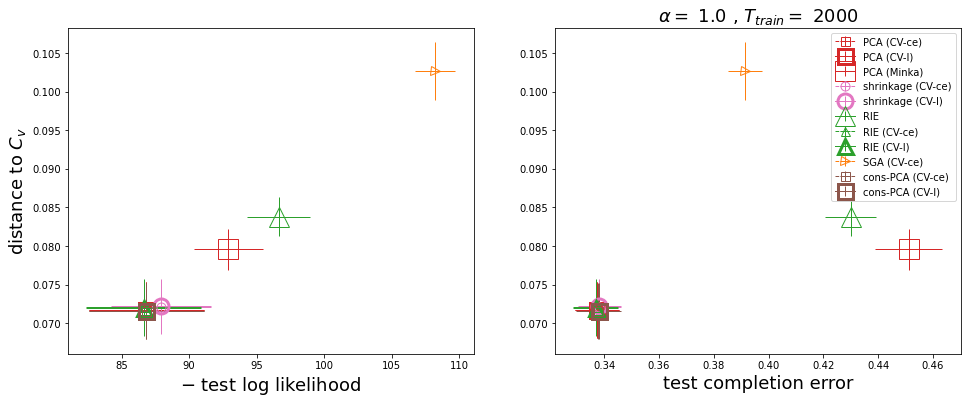

In [15]:
provisional_list=list(set(df.method))

if 'GA_bootstrapping=True_stop=likelihood' in provisional_list:
    provisional_list.remove('GA_bootstrapping=True_stop=likelihood')
if 'GA_bootstrapping=False_stop=likelihood' in provisional_list:
    provisional_list.remove('GA_bootstrapping=False_stop=likelihood')
if 'Lasso_CV' in provisional_list:
    provisional_list.remove('Lasso_CV')
if 'Oracle' in provisional_list:
    provisional_list.remove('Oracle')
if 'PCA_CV_pseudolikelihood' in provisional_list:
        provisional_list.remove('PCA_CV_pseudolikelihood')
if 'Shrink_CV_pseudolikelihood' in provisional_list:
        provisional_list.remove('Shrink_CV_pseudolikelihood')
if 'ConservativePCA_CV_pseudolikelihood' in provisional_list:
        provisional_list.remove('ConservativePCA_CV_pseudolikelihood')
if 'RIE_CV_pseudolikelihood' in provisional_list:
        provisional_list.remove('RIE_CV_pseudolikelihood')
if 'GA_bootstrapping=False_stop=completion' in provisional_list:
        provisional_list.remove('GA_bootstrapping=False_stop=completion')

provisional_list=np.array(provisional_list)
lista_metodi=reorder_list_methods(provisional_list)


criterioX1='test_likelihood'
criterioX2='test_completion_error'

xlabel1='$-$ test log likelihood'
xlabel2='test completion error'

criterioY='diffCtrue'

myaxessize=18

myalpha=1.
myTtrain=2000


fig, axs = plt.subplots(1,2, figsize=(16,6))

plt.title("$\\alpha = $ "+str(myalpha)+" , $T_{{ train}} = $ "+str(myTtrain),size=myaxessize)

for ax,criterioX,myxlabel in zip( axs.flat , [criterioX1,criterioX2] , [xlabel1,xlabel2] ):

    for metodo in lista_metodi:
   
        datix=df[(df.alpha==myalpha) & (df.Ttrain==myTtrain) & (df.method==metodo) & \
                       (df.criterium==criterioX)]["value"]
        if criterioX == 'test_completion_error':
            datix=np.abs(datix)
        if criterioX == 'test_likelihood':
            datix=-datix

        X2s=np.mean( datix )

        Xerr=sem( datix )

        datiy=df[(df.alpha==myalpha) & (df.Ttrain==myTtrain) & (df.method==metodo) & \
                       (df.criterium==criterioY)]["value"]

        Ys=np.mean( datiy )

        Yerr=sem(datiy )

        pippo=line2Dprops_methods(metodo)

        ax.set_xlabel(myxlabel,size=myaxessize)
        if criterioX == criterioX1:
            ax.set_ylabel(legend_criteria(criterioY),size=myaxessize)

        ax.errorbar(X2s,Ys,xerr=Xerr,yerr=Yerr,\
                         marker=pippo['marker'],mfc = 'None',ms=pippo['ms'],\
                                     label=legend_methods(metodo),\
                        ls=pippo['ls'], lw=1.,mew=pippo['mew'],color='C'+str(pippo['colorindex']))
plt.legend()

#plt.savefig("observable_comparison_alpha"+str(myalpha)+"_Ttrain"+str(myTtrain)+".pdf")

plt.show()

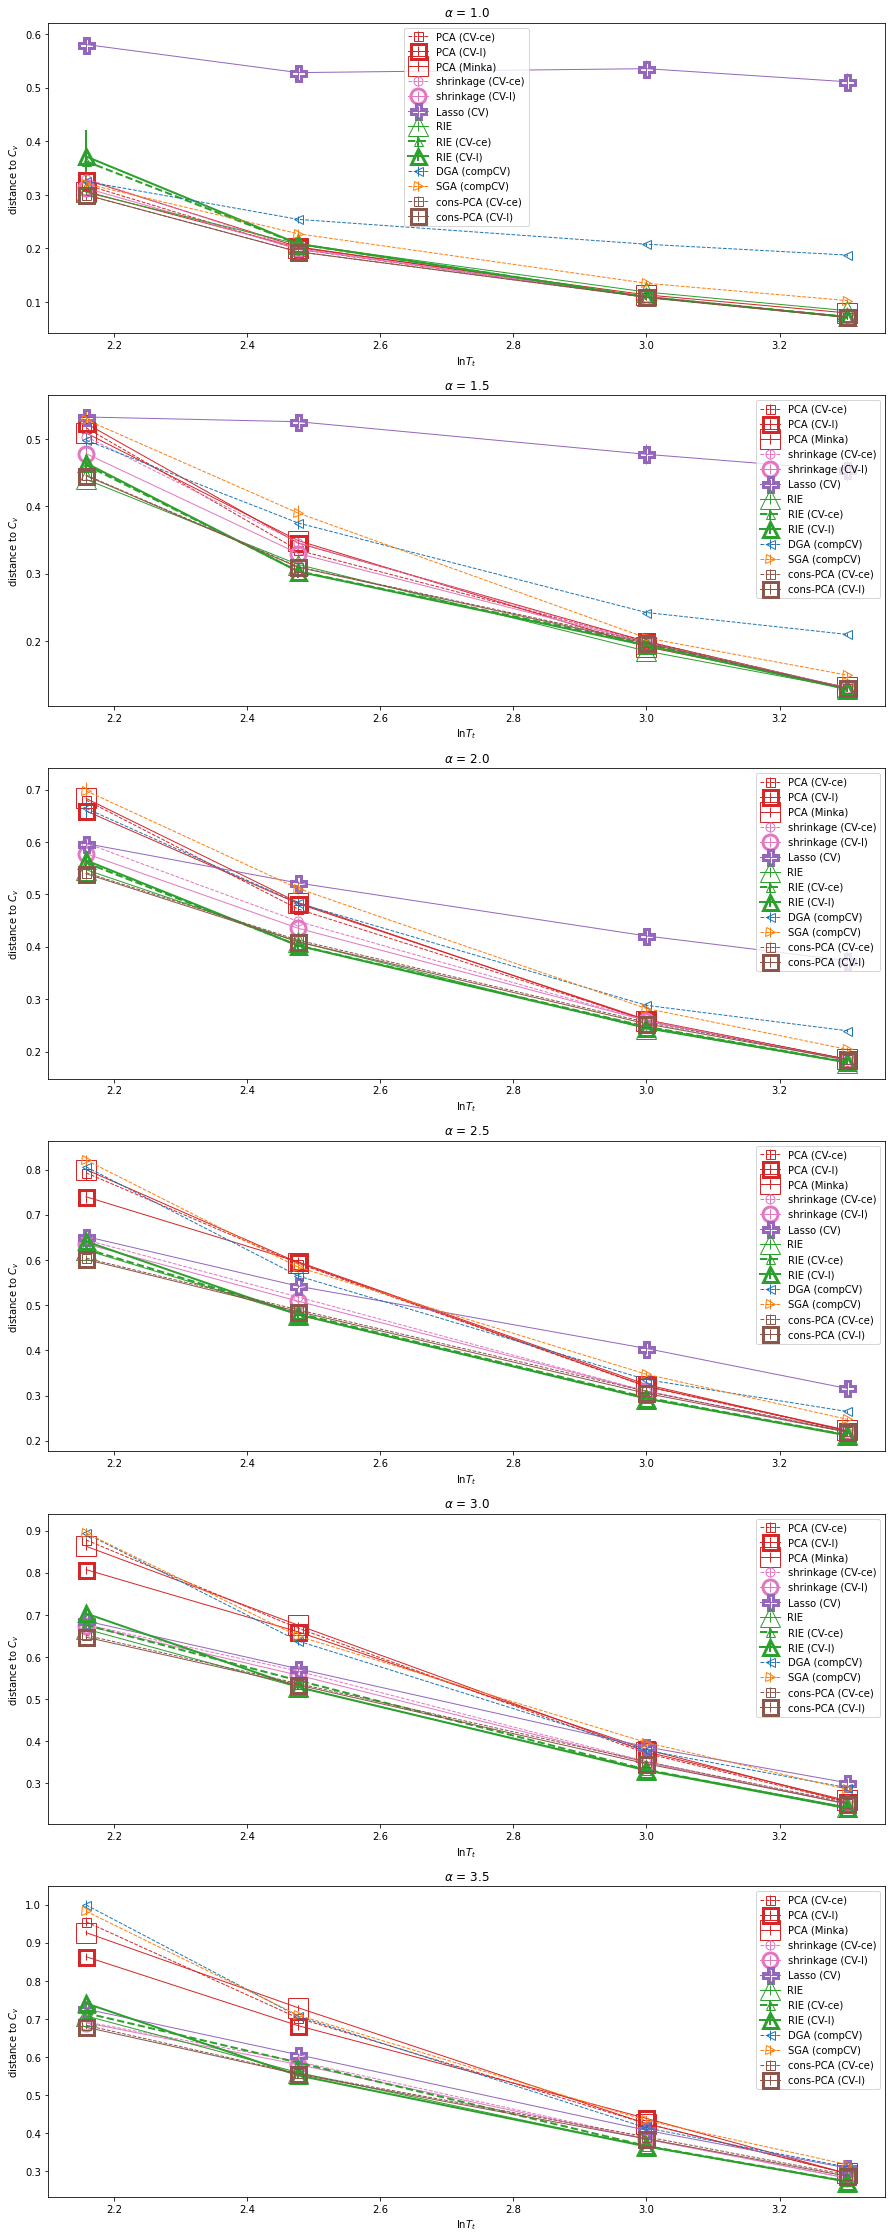

In [39]:

#for metodo in set(df.method):

criterio='diffCtrue'
#criterio='test_likelihood'
#criterio='test_completion_error'
#criterio='diffJtrue'
#criterio="rel_diffCtrue"
#criterio="rel_diffJtrue"
#criterio="diffCtrue_HS"
#criterio="diffJtrue_HS"


from matplotlib.lines import Line2D

fig, axs = plt.subplots(6, 1, figsize=(15,40))
#fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)



provisional_list=list(set(df.method))

if 'PCA_CV_pseudolikelihood' in provisional_list:
        provisional_list.remove('PCA_CV_pseudolikelihood')
if 'Shrink_CV_pseudolikelihood' in provisional_list:
        provisional_list.remove('Shrink_CV_pseudolikelihood')
if 'ConservativePCA_CV_pseudolikelihood' in provisional_list:
        provisional_list.remove('ConservativePCA_CV_pseudolikelihood')
if 'RIE_CV_pseudolikelihood' in provisional_list:
        provisional_list.remove('RIE_CV_pseudolikelihood')
if 'GA_bootstrapping=False_stop=completion' in provisional_list:
        provisional_list.remove('GA_bootstrapping=False_stop=completion')


if criterio != 'test_completion_error':
    if 'GA_bootstrapping=True_stop=likelihood' in provisional_list:
        provisional_list.remove('GA_bootstrapping=True_stop=likelihood')
    if 'GA_bootstrapping=False_stop=likelihood' in provisional_list:
        provisional_list.remove('GA_bootstrapping=False_stop=likelihood')

if criterio == 'test_completion_error': 
    if 'Lasso_CV' in provisional_list:
        provisional_list.remove('Lasso_CV')

if criterio == 'diffCtrue':
    if 'Oracle' in provisional_list:
        provisional_list.remove('Oracle')
    
    
#provisional_list=np.array(provisional_list)
lista_metodi=reorder_list_methods(provisional_list)


lista_alphas=np.sort(list(set(df.alpha)))

for ax,myalpha in zip( axs.flat ,lista_alphas ):
    for metodo in  lista_metodi :
        nxs=len(list(set(df.Ttrain)))
        avs=np.zeros(nxs)
        stds=np.zeros(nxs)

        for i,myTtrain in enumerate(list(set(df.Ttrain))):
            avs[i] = np.mean( df[(df.alpha==myalpha) & (df.Ttrain==myTtrain) & (df.method==metodo) & \
                   (df.criterium==criterio)]["value"] )
            if criterio=='test_completion_error': avs[i]=np.abs(avs[i])
            stds[i] = sem( df[(df.alpha==myalpha) & (df.Ttrain==myTtrain) & (df.method==metodo) & \
                   (df.criterium==criterio)]["value"] )
        indices=np.argsort(list(set(df.Ttrain)))

        pippo=line2Dprops_methods(metodo)

        ax.set_ylabel(legend_criteria(criterio))
        ax.set_xlabel('$\\ln T_{{t}}$')

        
        ax.set_title('$\\alpha$ = '+str(myalpha))
        
        ax.errorbar(np.log(np.array(list(set(df.Ttrain)))[indices])/np.log(10.),avs[indices],\
                     yerr=stds[indices],fmt='s-',\
                 label=legend_methods(metodo),\
                     marker=pippo['marker'],\
                    mfc ='none',\
                    ms=pippo['ms'],\
                    ls=pippo['ls'],lw=pippo['lw'],mew=pippo['mew'],color='C'+str(pippo['colorindex']))

        
        
        
        ax.legend()    
        
#plt.ylim((-170,-150))
#plt.savefig(criterio+"_vs_Ttrain.pdf")
plt.show()
    


# Analysis of empirical fMRI Tommaso data

In [73]:
resfile_fMRI1 = 'all_results_tommaso_final.pickle'

with open(resfile_fMRI1, 'rb') as f:
    all_results_fMRI1 = pickle.load(f)

In [74]:
resfile_fMRI2 = 'all_results_tommaso.pickle'

with open(resfile_fMRI2, 'rb') as f:
    all_results_fMRI2 = pickle.load(f)

In [75]:
df_fMRI1 = pd.DataFrame(list(utils.splat_dict(all_results_fMRI1)), columns=["subject", "method", "criterium", "value"])
df_fMRI1 = df_fMRI1[(df_fMRI1.criterium != "history") & (df_fMRI1.criterium != "Cclean") &\
                   (df_fMRI1.method != "Ctrue")]
df_fMRI1 = df_fMRI1[(df_fMRI1.method != "true_params")]
df_fMRI1["value"] = df_fMRI1["value"].astype(float)
#df_fMRI["subject"] = list(map(lambda x : x[0], df_fMRI.subject))

#df

In [76]:
#df_fMRI = pd.DataFrame(list(utils.splat_dict(all_results_fMRI)), columns=["subject", "method", "criterium", "value"])
df_fMRI2 = pd.DataFrame(list(utils.splat_dict(all_results_fMRI2)), columns=["subject", "method", "criterium", "value","other"])
df_fMRI2 = df_fMRI2[(df_fMRI2.criterium != "history") & (df_fMRI2.criterium != "Cclean") &\
                   (df_fMRI2.method != "Ctrue")]
df_fMRI2 = df_fMRI2[(df_fMRI2.method != "true_params")]
df_fMRI2["value"] = df_fMRI2["value"].astype(float)
#df_fMRI["subject"] = list(map(lambda x : x[0], df_fMRI.subject))

#df

In [77]:
df_fMRI=pd.concat([df_fMRI1,df_fMRI2])

In [78]:
df_fMRI.groupby(["method", "criterium"])["value"].mean().unstack()

criterium,test_completion_error,test_likelihood,test_pseudolikelihood,time,train_completion_error,train_likelihood,train_pseudolikelihood
method,,,,,,,
ConservativePCA_CV_completion_error,0.344820,-86.341734,-0.583660,4.110964,0.221462,-57.714662,-0.202286
ConservativePCA_CV_likelihood,0.346263,-86.115446,-0.575983,6.672286,0.232870,-62.371073,-0.273505
ConservativePCA_CV_pseudolikelihood,0.346845,-86.363820,-0.577822,4.332122,0.236909,-63.934923,-0.295700
FA_CV,0.558935,-91.717021,NaN,NaN,0.524211,-66.976057,NaN
GA_bootstrapping=False_stop=completion,0.349988,-95.056396,NaN,NaN,0.239654,-82.029142,NaN
GA_bootstrapping=False_stop=likelihood,0.354139,-89.178372,NaN,NaN,0.245107,-71.334358,NaN
GA_bootstrapping=True_stop=completion,0.348948,-94.973372,NaN,NaN,0.251982,-82.939118,NaN
PCA_CV,-0.381881,-99.899996,NaN,NaN,-0.301029,-68.710148,NaN
PCA_CV_completion_error,0.364119,-105.076536,-0.886752,4.518615,0.247987,-56.540992,-0.229139


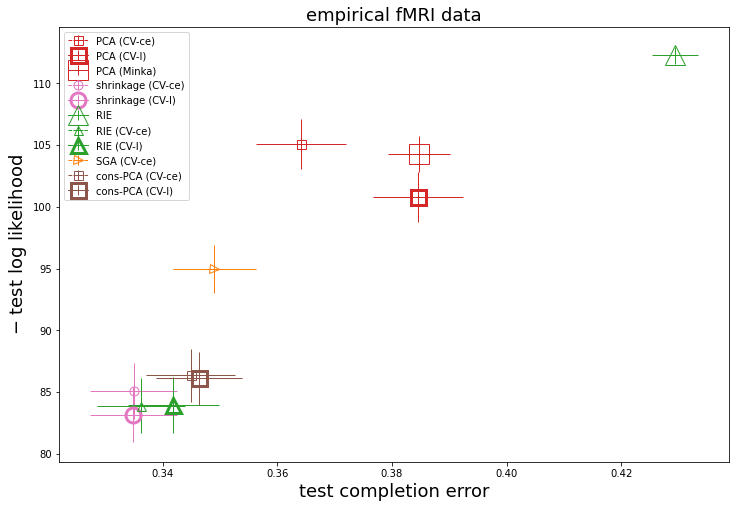

In [88]:
provisional_list=list(set(df.method))

if 'GA_bootstrapping=True_stop=likelihood' in provisional_list:
    provisional_list.remove('GA_bootstrapping=True_stop=likelihood')
if 'GA_bootstrapping=False_stop=likelihood' in provisional_list:
    provisional_list.remove('GA_bootstrapping=False_stop=likelihood')
if 'Lasso_CV' in provisional_list:
    provisional_list.remove('Lasso_CV')
if 'PCA_CV_pseudolikelihood' in provisional_list:
        provisional_list.remove('PCA_CV_pseudolikelihood')
if 'Shrink_CV_pseudolikelihood' in provisional_list:
        provisional_list.remove('Shrink_CV_pseudolikelihood')
if 'ConservativePCA_CV_pseudolikelihood' in provisional_list:
        provisional_list.remove('ConservativePCA_CV_pseudolikelihood')
if 'RIE_CV_pseudolikelihood' in provisional_list:
        provisional_list.remove('RIE_CV_pseudolikelihood')
if 'GA_bootstrapping=False_stop=completion' in provisional_list:
        provisional_list.remove('GA_bootstrapping=False_stop=completion')
if 'Oracle' in provisional_list:
        provisional_list.remove('Oracle')

        
provisional_list=np.array(provisional_list)
lista_metodi=reorder_list_methods(provisional_list)


criterioY='test_likelihood'
criterioX='test_completion_error'

ylabel='$-$ test log likelihood'
xlabel='test completion error'

myaxessize=18


fig, ax = plt.subplots(1,1)

plt.title("empirical fMRI data",size=myaxessize)


for metodo in lista_metodi:

    datix=df_fMRI[(df_fMRI.method==metodo) & \
                   (df_fMRI.criterium==criterioX)]["value"]
    datiy=df_fMRI[(df_fMRI.method==metodo) & \
                   (df_fMRI.criterium==criterioY)]["value"]

    datix=np.abs(datix)
    datiy=-datiy

    Xs=np.mean( datix )
    Xerr=sem( datix )
    Ys=np.mean( datiy )
    Yerr=sem(datiy )


    ax.set_xlabel(xlabel,size=myaxessize)
    ax.set_ylabel(ylabel,size=myaxessize)


    pippo=line2Dprops_methods(metodo)
    ax.errorbar(Xs,Ys,xerr=Xerr,yerr=Yerr,\
                     marker=pippo['marker'],mfc = 'None',ms=pippo['ms'],\
                                 label=legend_methods(metodo),\
                    ls=pippo['ls'], lw=1.,mew=pippo['mew'],color='C'+str(pippo['colorindex']))

plt.legend()

plt.savefig("observable_comparison_fMRI.pdf")

plt.show()